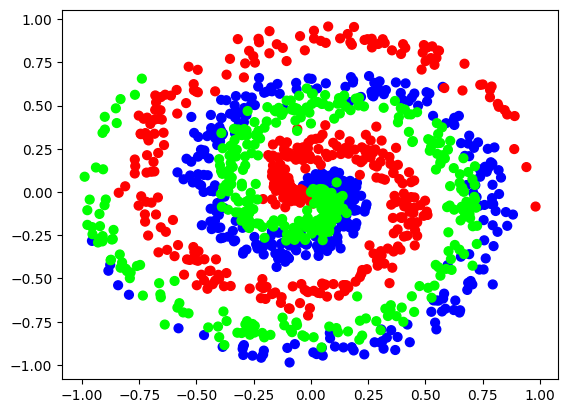

In [21]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()
X,y = spiral_data(samples = 400 , classes = 3)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='brg')
plt.show()

In [22]:
# need to convert the spiral data into dataframe
# each point in the spiral is a sample with 2 features (x and y coordinates)
# and a label (the class it belongs to)
import pandas as pd
df = pd.DataFrame(X, columns=['x1', 'x2'])

In [23]:
df.head()

,x1,x2
0,0.000000,0.000000
1,0.000560,0.002443
2,0.002575,0.004301
3,0.006996,0.002755
4,0.008615,0.005126


In [27]:
# Dense layer
class Layer_Dense:
 # Layer initialization
 def __init__(self, n_inputs, n_neurons):
 # Initialize weights and biases
   self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)* np.sqrt(2. / n_inputs)
   self.biases = np.zeros((1, n_neurons))

 # Forward pass
 def forward(self, inputs):
 # Calculate output values from inputs, weights and biases
   self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self , inputs):
        self.output = np.maximum(0,inputs)
    
class Activation_softmax:
    def forward(self , inputs):
        exp_values = np.exp(inputs - np.max(inputs , axis = 1 , keepdims=True))
        self.output = exp_values/np.sum(exp_values , axis = 1 , keepdims=True)
      
class Activation_Tanh:
    def forward(self, inputs):
        self.output = np.tanh(inputs)
  
def categorical_cross_entropy(y_pred, y_true):
    """
    y_pred: predicted probabilities from softmax (batch_size, num_classes)
    y_true: one-hot encoded true labels (batch_size, num_classes)
    """
    # Clip predictions to prevent log(0)
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)
    
    # Compute loss per sample
    sample_losses = -np.sum(y_true * np.log(y_pred), axis=1)
    
    # Average over batch
    return np.mean(sample_losses)


In [28]:
# Create dataset
X, y = spiral_data(samples=10000, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 16)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(16, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_softmax()

num_classes = 3
y_one_hot = np.eye(num_classes)[y]

# Make a forward pass of our training data through this layer
dense1.forward(X)


# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
y_pred = activation2.output  # softmax output
y_true = y_one_hot           # one-hot encoded true labels

loss = categorical_cross_entropy(y_pred, y_true)
print("Categorical Cross-Entropy Loss:", loss)


Categorical Cross-Entropy Loss: 1.0986071


In [29]:
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    y_pred = activation2.output
    
    # Compute loss
    loss = categorical_cross_entropy(y_pred, y_one_hot)
    
    # Backpropagation
    dZ2 = (y_pred - y_one_hot) / y_one_hot.shape[0]
    dW2 = activation1.output.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2.dot(dense2.weights.T)
    dZ1 = dA1 * (activation1.output > 0)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights
    dense1.weights -= learning_rate * dW1
    dense1.biases  -= learning_rate * db1
    dense2.weights -= learning_rate * dW2
    dense2.biases  -= learning_rate * db2

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.0986
Epoch 100, Loss: 1.0986
Epoch 200, Loss: 1.0986
Epoch 300, Loss: 1.0986
Epoch 400, Loss: 1.0986
Epoch 500, Loss: 1.0986
Epoch 600, Loss: 1.0986
Epoch 700, Loss: 1.0986
Epoch 800, Loss: 1.0986
Epoch 900, Loss: 1.0986
